<a href="https://colab.research.google.com/github/Joshmi-K-Joy/data-analytics-lab/blob/main/Basics_of_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# For reproducibility
random.seed(42)
np.random.seed(42)

In [ ]:
# a. Tossing a coin 10,000 times
def simulate_coin_toss(n=10000):
    outcomes = [random.choice(['H', 'T']) for _ in range(n)]
    heads = outcomes.count('H')
    tails = outcomes.count('T')
    return {
        'Total Tosses': n,
        'Heads': heads,
        'Tails': tails,
        'P(Heads)': heads/n,
        'P(Tails)': tails/n
    }

# b. Rolling two dice and getting sum = 7
def simulate_dice_sum(n=10000):
    count_sum_7 = 0
    for _ in range(n):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            count_sum_7 += 1
    return {
        'Total Rolls': n,
        'Sum=7 Count': count_sum_7,
        'P(Sum=7)': count_sum_7/n
    }

print(" Coin Toss Simulation:", simulate_coin_toss())
print(" Dice Sum=7 Simulation:", simulate_dice_sum())

 Coin Toss Simulation: {'Total Tosses': 10000, 'Heads': 4984, 'Tails': 5016, 'P(Heads)': 0.4984, 'P(Tails)': 0.5016}
 Dice Sum=7 Simulation: {'Total Rolls': 10000, 'Sum=7 Count': 1570, 'P(Sum=7)': 0.157}


In [ ]:
def estimate_one_six_probability(trials=10000):
    success_count = 0
    for _ in range(trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success_count += 1
    return {
        'Trials': trials,
        'Successes (at least one 6)': success_count,
        'Estimated P(at least one 6)': success_count / trials
    }
print("At Least One 6 in 10 Rolls:", estimate_one_six_probability())

At Least One 6 in 10 Rolls: {'Trials': 10000, 'Successes (at least one 6)': 8403, 'Estimated P(at least one 6)': 0.8403}


In [ ]:
def simulate_balls_draw(n=1000):
    colors = ['Red'] * 5 + ['Green'] * 7 + ['Blue'] * 8
    previous = None
    total_blue_then_red = 0
    total_prev_blue = 0

    for _ in range(n):
        current = random.choice(colors)
        if previous == 'Blue':
            total_prev_blue += 1
            if current == 'Red':
                total_blue_then_red += 1
        previous = current

    conditional_prob = total_blue_then_red / total_prev_blue if total_prev_blue else 0
    return {
        'Total Pairs where previous was Blue': total_prev_blue,
        'Red after Blue Count': total_blue_then_red,
        'P(Red | Blue)': conditional_prob
    }


print(" Conditional Probability P(Red | Blue):", simulate_balls_draw())

 Conditional Probability P(Red | Blue): {'Total Pairs where previous was Blue': 401, 'Red after Blue Count': 104, 'P(Red | Blue)': 0.2593516209476309}


In [ ]:
def simulate_discrete_rv(n=1000):
    values = [1, 2, 3]
    probs = [0.25, 0.35, 0.4]
    sample = np.random.choice(values, size=n, p=probs)
    return {
        'Sample Mean': np.mean(sample),
        'Sample Variance': np.var(sample),
        'Sample Std Dev': np.std(sample),
        'Sample Counts': dict(Counter(sample))
    }


print("Discrete Random Variable Stats:", simulate_discrete_rv())


Discrete Random Variable Stats: {'Sample Mean': np.float64(2.131), 'Sample Variance': np.float64(0.6338389999999999), 'Sample Std Dev': np.float64(0.7961400630542341), 'Sample Counts': {np.int64(3): 391, np.int64(2): 349, np.int64(1): 260}}


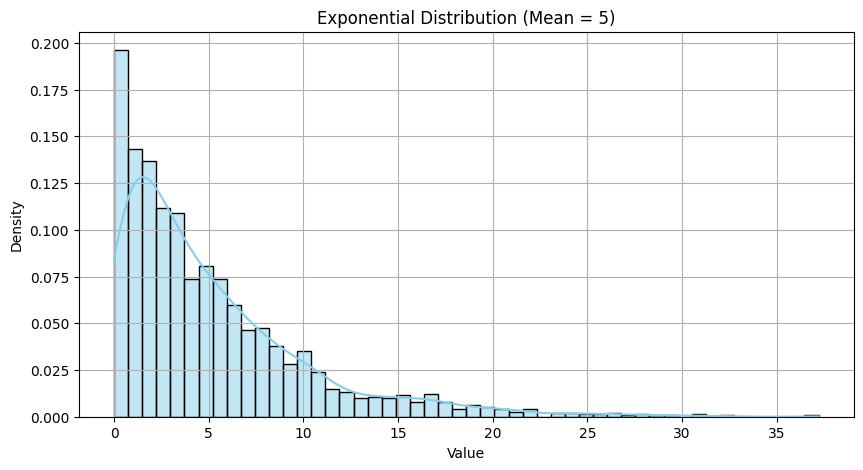

In [ ]:
def simulate_exponential_distribution(n=2000, mean=5):
    data = np.random.exponential(scale=mean, size=n)
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=50, kde=True, stat="density", color='skyblue')
    plt.title("Exponential Distribution (Mean = 5)")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()


simulate_exponential_distribution()

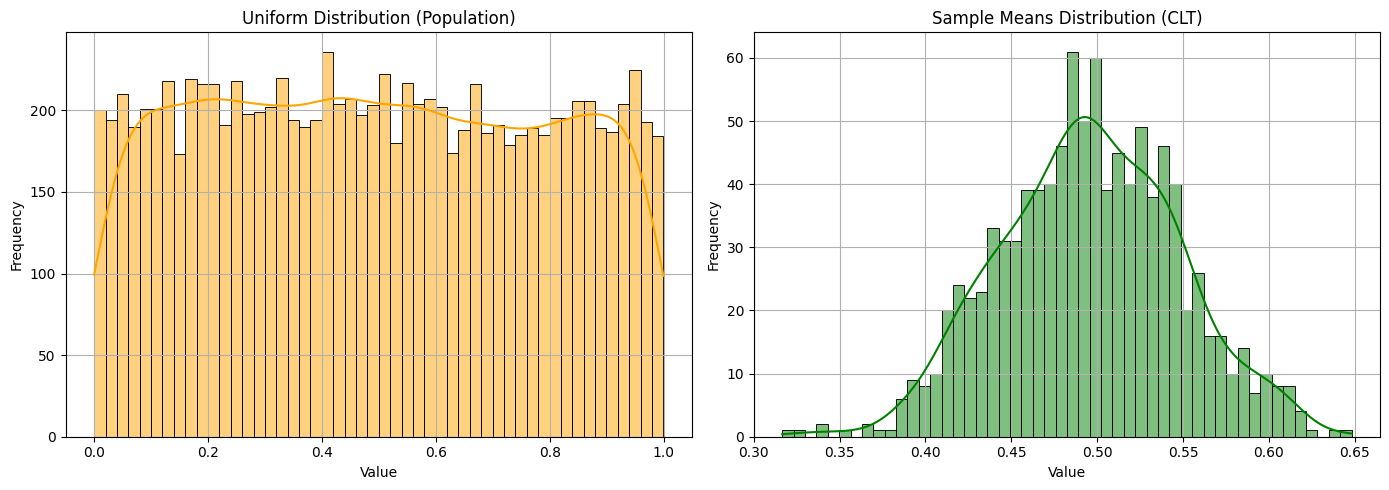

In [ ]:
def simulate_central_limit_theorem():
    population = np.random.uniform(0, 1, 10000)

    sample_means = []
    for _ in range(1000):
        sample = np.random.choice(population, size=30)
        sample_means.append(np.mean(sample))


    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(population, bins=50, kde=True, ax=axs[0], color='orange')
    axs[0].set_title("Uniform Distribution (Population)")

    sns.histplot(sample_means, bins=50, kde=True, ax=axs[1], color='green')
    axs[1].set_title("Sample Means Distribution (CLT)")

    for ax in axs:
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


simulate_central_limit_theorem()